<h1> Gender Classification Based on Vocal Features</h1>

Duc Huynh

<h3> Data Preprocessing</h3>

In [14]:
import kagglehub
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

#Download dataset
data=kagglehub.dataset_download("murtadhanajim/vocal-gender-features")
data2=os.path.join(data,"vocal_gender_features_new.csv")
df=pd.read_csv(data2)

#Drop null values
df = df.dropna()

#View dataset
df

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,1879.614568,1092.394432,1802.821290,479.751352,19.930251,0.017547,3882.812500,0.116425,0.088527,1458.0010,...,12.486454,-4.034742,13.771613,-5.278946,14.380637,5.627317,9.196584,-7.411221,12.621205,1
16144,1810.603695,1124.628905,1829.785209,491.274993,19.115077,0.017356,3816.685268,0.110338,0.067830,1538.0670,...,12.727633,-2.590058,15.919325,-6.724170,14.858981,6.610045,8.266881,-6.264262,13.771297,1
16145,1820.216958,1197.520780,1770.716715,509.906085,19.506173,0.015819,3728.759766,0.105142,0.073135,1637.4955,...,12.606261,-0.207149,15.909226,-9.772965,18.003307,4.041325,9.128441,-3.483847,11.820591,1
16146,1636.619660,1055.832051,1747.968472,500.649272,19.118411,0.014007,3524.797712,0.094456,0.071088,1453.4177,...,11.453891,-2.735264,15.467333,-4.670631,12.668987,3.787537,8.726358,-7.397458,13.588392,1


The 'label' column represents numbers of Male(1) and Female(0). Now we will get a count of Males and Females in the dataset:

In [15]:
counts=df['label'].value_counts()
print(counts)

label
1    10380
0     5768
Name: count, dtype: int64


<h3>Logistic Regression Training Model

Model Accuracy:0.9995


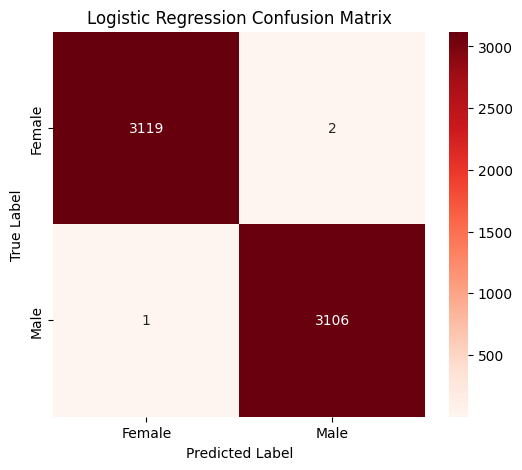

In [16]:
X = df.drop(columns=['label'])
y = df['label']

# Standardize data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Create polynomial features
poly=PolynomialFeatures(degree=2,interaction_only=False)
X_poly=poly.fit_transform(X_scaled)
poly_feature_names=poly.get_feature_names_out(X.columns)

# Apply SMOTE to balance the dataset
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_poly,y)

# Split data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=42)

# Train the Logistic Regression Model
log_reg=LogisticRegression(max_iter=1000,solver='lbfgs')
log_reg.fit(X_train,y_train)

# Make predictions
y_pred=log_reg.predict(X_test)

# Evaluate the model
accuracy=accuracy_score(y_test, y_pred)
print(f"Model Accuracy:{accuracy:.4f}")

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds",xticklabels=["Female","Male"],yticklabels=["Female","Male"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

The Logistic Regression Model shows almost perfection in classifying male and female voices, with a very high accuracy of 99.95%. Also, the confusion matrix comes up with only 1 false negative case (misclassifying a female voice as male) and 2 false positive cases (misclassifying male voice as female), which makes it an ideal classifying model.


<h3>K-Nearest Neighbors Model

Best k: 7


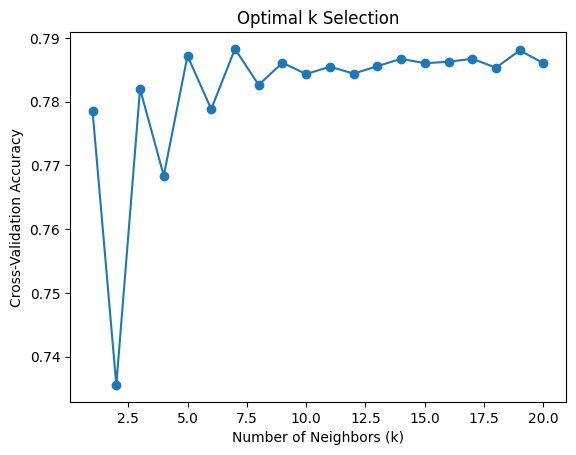

In [17]:
predictors=['mean_spectral_centroid','mean_pitch','rms_energy','mfcc_5_mean','mean_spectral_contrast','std_spectral_bandwidth']
target='label'

X=df[predictors].values
y=df[target].values

# Standardize data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)

# Split data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

k_values=range(1, 21)
scores=[]

# Find best k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5).mean()
    scores.append(score)
best_k = k_values[np.argmax(scores)]
print(f"Best k value: {best_k}")

# Plot k vs accuracy
plt.plot(k_values,scores,marker='o')
plt.xlabel("k Number")
plt.ylabel("Accuracy")
plt.show()

In [20]:
#Train KNN Model with k=7
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)
accuracy=(predictions == y_test).mean()
print(f"Test Accuracy (k=7): {accuracy:.4f}")
train_accuracy = knn.score(X_train, y_train)
print(f"Train Accuracy (k=7): {train_accuracy:.4f}")

Test Accuracy (k=7): 0.7864
Train Accuracy (k=7): 0.8431


The KNN Model shows a low testing accuracy of 78.64% and low training accuracy of 84.31%. The voice dataset seems to contain many features, which highly diminishes the KNN's performance because distances in higher dimensions become less meaningful.